# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

- The project aims to states the traffic and accidents in Saudi Arabia for years from 1993 to 2017 by analysing two datasets; the first one is the driving licenses data set which describe the number of driving licenses issued in Saudi Arabia from 1993 to 2017 and the second one is the traffic accidents which describe the number of traffic accidents, number of dead and injured happened in Saudi Arabia for the years 2016 and 2017 to investigate the reasons behind it to participate in the process of decision making and support the right decision.

## Executive Summary
After investigating the traffic and accidents in Saudi Arabia, we found out which regions having the highest and lowest Driving Licenses based on years (1993–2017), the highest regions were Riyadh and Makkah. The lowers region over years were Northern region and Albaha. And the regions that have more Traffic Accidents each year more than the average of Saudi Arabia were Eastern Region, Makkah and Riyadh for the years 2016-2017.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
#from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn import datasets

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
driving = pd.read_csv('../data/saudi-arabia-driving-licenses-2004-2008.csv',delimiter=';')
traffic = pd.read_csv('../data/saudi-arabia-traffic-accidents-2008.csv',delimiter=';')


#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
driving.head(10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


In [4]:
traffic.tail(10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
74,74,74,(2016),Qassim,No. of Casualties - Dead,397n,"26.1967063704, 43.3429998455"
75,75,75,(2016),Najran,No. of Casualties - Dead,173n,"18.4511003068, 46.8688495726"
76,76,76,(2016),Najran,No. of Casualties - Injured,706n,"18.4511003068, 46.8688495726"
77,77,77,(2016),Total,No. of Casualties - Dead,9031n,NaN
78,78,78,(2017),Makkah,No. of Accidents,145541n,"21.628962766, 41.2636898334"
79,79,79,(2017),Asir,No. of Casualties - Injured,2368n,"19.1387847401, 42.941470036"
80,80,80,(2017),Hail,No. of Casualties - Injured,773n,"27.400845724, 41.4406960508"
81,81,81,(2017),Al-Baaha,No. of Casualties - Dead,134n,"20.1484058503, 41.4665484892"
82,82,82,(2017),Al-Baaha,No. of Accidents,1414n,"20.1484058503, 41.4665484892"
83,83,83,(2017),Al-Baaha,No. of Casualties - Injured,1007n,"20.1484058503, 41.4665484892"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer: the dataframes have 3 columns that have same name: 'geo_point_2d', 'year' and 'unnamed: 0' also the columon 'Region in df2 and "administrative area' in df1 sames the same

#### 4a. How complete is the data?

Investigate missing values etc.

In [5]:
driving.isnull().sum()#findout is there null value and if yes how many

Unnamed: 0              0
Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

### seems like geo point hase 25 null values

In [6]:
traffic.isnull().sum()#findout is there null value and if yes how many

Unnamed: 0      0
Unnamed: 0.1    0
Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

### semms like geo point hase 25 null values

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [7]:
print(driving.max())#This function returns the maximum of the values in the given dataset.
print(driving.min())#This function returns the minimum of the values in the given dataset.
print('\n',traffic.max())
print(traffic.min())

Unnamed: 0                349
Year                   (2017)
Administritive Area     Total
Driving Liceses         9983n
dtype: object
Unnamed: 0                   0
Year                    (1993)
Administritive Area    Al-Baha
Driving Liceses        100291n
dtype: object

 Unnamed: 0                               83
Unnamed: 0.1                             83
Year                                 (2017)
Region                                Total
Indicator       No. of Casualties - Injured
Value                                99925n
dtype: object
Unnamed: 0                     0
Unnamed: 0.1                   0
Year                      (2016)
Region                  Al-Baaha
Indicator       No. of Accidents
Value                      1007n
dtype: object


#### 5. What are your data types? 
Display the data types of each feature. 

In [8]:
print(driving.dtypes)

print(traffic.dtypes)


Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object
Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: in in driving: 'driving liecence' and 'year' should be integer,terrafic:'value' and year should be integer.

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [9]:
#this function will convert numerical columns to an appropriate numeric type.
def convert_type(df):
    df=df.apply(pd.to_numeric,errors='ignore') 
    return df
#pd.to_datetime

- Make new columns `x` and `y` using `geo_point_2d`

In [10]:
traffic[['x','y']]=traffic['geo_point_2d'].str.split(',', 1, expand=True)
driving[['x','y']]=driving['geo_point_2d'].str.split(',', 1, expand=True)



- Fix any individual values preventing other columns from being the appropriate type.

In [11]:
traffic['Value'] = traffic['Value'].map(lambda x: x.replace('n',''))
traffic['Year'] = traffic['Year'].map(lambda x: x.strip('()'))

driving['Driving Liceses'] = driving['Driving Liceses'].map(lambda x: x.replace('n',''))
driving['Year'] = driving['Year'].map(lambda x: x.strip('()'))


- Finish your data modifications by making sure the columns are now typed appropriately.

In [12]:
traffic=convert_type(traffic)
driving=convert_type(driving)

- Display the data types again to confirm they are correct.

In [13]:
print(driving.dtypes)
print(traffic.dtypes)

#print the data
driving.head()


Unnamed: 0               int64
Year                     int64
Administritive Area     object
Driving Liceses          int64
geo_point_2d            object
x                      float64
y                      float64
dtype: object
Unnamed: 0        int64
Unnamed: 0.1      int64
Year              int64
Region           object
Indicator        object
Value             int64
geo_point_2d     object
x               float64
y               float64
dtype: object


,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,0,2012,Makkah,143954,"21.628962766, 41.2636898334",21.628963,41.26369
1,1,1994,Makkah,75349,"21.628962766, 41.2636898334",21.628963,41.26369
2,2,1998,Makkah,86082,"21.628962766, 41.2636898334",21.628963,41.26369
3,3,2004,Makkah,86636,"21.628962766, 41.2636898334",21.628963,41.26369
4,4,2005,Makkah,65099,"21.628962766, 41.2636898334",21.628963,41.26369


In [14]:
traffic.head()

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d,x,y
0,0,0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",21.628963,41.263690
1,1,1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",23.288331,50.147830
2,2,2,2016,Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",27.901655,37.259858
3,3,3,2016,Hail,No. of Casualties - Dead,299,"27.400845724, 41.4406960508",27.400846,41.440696
4,4,4,2016,Hail,No. of Accidents,10199,"27.400845724, 41.4406960508",27.400846,41.440696


#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [15]:
driving.rename(columns={'Unnamed: 0':'driving_id','Year':'year', 'Administritive Area':'region','Driving Liceses':'driving_licenses','geo_point_2d':'coordinates','x':'longitude','y':'latitude'}, inplace=True) 

traffic.rename(columns={'Unnamed: 0':'traffic_id','Unnamed: 0.1':'traffic_id1','Year':'year','Region':'region','Indicator':'traffic_type','Value':'traffic_accidents','geo_point_2d':'coordinates','x':'longitude','y':'latitude'}, inplace=True) 




In [16]:
#drop unnessary columns
driving.drop(driving.columns[[0,4]], axis = 1,inplace = True) 

driving.head()

,year,region,driving_licenses,longitude,latitude
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369
3,2004,Makkah,86636,21.628963,41.26369
4,2005,Makkah,65099,21.628963,41.26369


In [17]:
#drop unnessary columns
traffic.drop(traffic.columns[[0,1,6]], axis = 1,inplace = True) 

traffic.head()

,year,region,traffic_type,traffic_accidents,longitude,latitude
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**


- **Traffic Accidents**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|int|Traffic_Accidents|The year of the accidents or the casualties  | 
|region|object|Traffic_Accidents|The region where accidents or casualties happend | 
|traffic_type|object|Traffic_Accidents|the type of traffic status: Accidents or Casualties in specific region & year, it show also the type of casualties: dead or injured | 
|traffic_accidents|int|Traffic_Accidents|The number of Accidents and Casualties| 
|longitude|float|Traffic_Accidents|The geographic coordinate that specifies the position of a place on Earth, east-west   of the prime meridian| 
|latitude|float|Traffic_Accidents|The geographic coordinate that specifies the position of a place on Earth, north-south| 



- **Driving Licenses**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|year|int|Driving_Licenses|The year where the Driving Licenses were issued| 
|driving_licenses|int|Driving_Licenses|The number of driving licenses in specific region and specific year| 
|region|object|Driving_Licenses|The region where the Driving Licenses were issued | 
|longitude|float|Driving_Licenses|The geographic coordinate that specifies the position of a place on Earth, east-west of the prime meridian| 
|latitude|float|Driving_Licenses|The geographic coordinate that specifies the position of a place on Earth, north-south| 



#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:

0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [18]:
#0 iam doing value counts for column region to see what values it contains
driving['region'].value_counts()

traffic['region'].value_counts()

Total               6
Jazan               6
Eastern Region      6
Najran              6
Hail                6
Qassim              6
Al-Jouf             6
Riyadh              6
Northern Boarder    6
Madinah             6
Tabouk              6
Makkah              6
Al-Baaha            6
Asir                6
Name: region, dtype: int64

### 1. Confirm the numbers of all regions add up to total.
### answer:1- i am going to create pivot table to compare total value with the sum of the regions

In [19]:
#1. Confirm the numbers of all regions add up to total.
#answ: i am going to create pivot table to compare total value with the sum of the regions
driving_copy=driving.pivot(index='region', columns='year', values="driving_licenses").reset_index()
traffic_copy=traffic.pivot(index=['region','year'], columns="traffic_type", values="traffic_accidents").reset_index()

In [20]:
#here will take year 1993 as example and copare the total number of accedents with the sum of the regions in that year 
#to Confirm the numbers of all regions add up to total.
#for driving licenses dataframe
test_total=0
j=0
for i in driving_copy.region:
    if j!=13:
        test_total+=driving_copy.values[j][1]
    j+=1
    
if test_total ==driving_copy.values[13][1]:
    print('numbers of all regions add up to total and total value is not associated with column region cause it just sum of all rejions value in specific year')

numbers of all regions add up to total and total value is not associated with column region cause it just sum of all rejions value in specific year


## numbers of all regions add up to total and total value is not associated with column region

##2. Remove the rows that are not associated with regions

In [21]:
new_driving=driving[(driving['region']!='Total')]
#new
new_traffic=traffic[(traffic['region']!='Total')]
new_traffic.dtypes

year                   int64
region                object
traffic_type          object
traffic_accidents      int64
longitude            float64
latitude             float64
dtype: object

In [22]:
new_traffic.dtypes

year                   int64
region                object
traffic_type          object
traffic_accidents      int64
longitude            float64
latitude             float64
dtype: object

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [23]:
#convert driving liecene data to wide
driving_wide=new_driving.pivot(index=['region'], columns='year', values="driving_licenses")
driving_wide

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
region,,,,,,,,,,,,,,,,,,,,,
Al-Baha,3270,2729,2423,1468,3027,5110,4246,4832,7594,3335,...,5418,9815,7076,6450,7593,7482,7268,4856,4614,4131
Al-Jouf,2884,2535,2270,2518,3565,3476,3950,4666,4756,5940,...,10929,10567,10937,10180,10246,11602,9982,10233,9371,8091
Al-Qaseem,73618,68916,49690,42693,10092,11350,9983,12226,14718,16298,...,22236,27571,36737,10760,11421,17889,29113,13631,9180,6318
Assir,6226,5185,4889,3319,12204,13220,14625,18622,20321,20417,...,18800,21582,21835,24515,23136,29730,29552,38567,41367,39133
Eastern,9964,10918,7831,8461,58814,70650,64973,65767,74119,85035,...,104626,108544,110295,151087,129971,123325,121774,135752,142307,126816
Hail,10484,11131,9735,10267,6606,4708,3139,3215,6077,5070,...,7413,7282,7637,9123,11082,9731,10417,7172,54507,22035
Jazan,6009,3826,2284,2226,5695,2613,4792,5678,10631,5254,...,11346,9437,12270,10946,11156,14175,15621,13931,11504,18345
Madinah,4122,3767,4155,3425,10495,13020,11108,9562,13561,10494,...,9194,11574,15045,14630,14459,28513,31447,22744,24540,36165
Makkah,65977,75349,60356,46195,76623,86082,103535,87053,85593,88593,...,77013,112045,113531,110647,143954,131108,149234,157389,136055,142487


In [24]:
#convert traffic data to wide
trafficwide=new_traffic.pivot(index=['region','year'], columns="traffic_type", values="traffic_accidents").reset_index()
trafficwide
#

traffic_type,region,year,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured
0,Al-Baaha,2016,3618,185,1227
1,Al-Baaha,2017,1414,134,1007
2,Al-Jouf,2016,10212,245,920
3,Al-Jouf,2017,10469,240,862
4,Asir,2016,32684,983,2541
5,Asir,2017,25245,828,2368
6,Eastern Region,2016,101619,1113,4893
7,Eastern Region,2017,81433,963,4073
8,Hail,2016,10199,299,932
9,Hail,2017,9379,265,773


#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

#change region names in traffic dataframes to match driving dataframe before merging for example one dataframe write al-baaha and the other write it as al-baha

In [25]:
new_traffic = new_traffic.replace({

    'region': {'Al-Baaha' :'Al-Baha','Asir':'Assir','Qassim':'Al-Qaseem','Eastern Region':'Eastern'}
})

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable.
Which join should you use to preserve the most data?

In [26]:
merged_df=pd.merge(new_traffic,new_driving,on=['year','region'], how='inner')

merged_df.head()

,year,region,traffic_type,traffic_accidents,longitude_x,latitude_x,driving_licenses,longitude_y,latitude_y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.26369,136055,21.628963,41.26369
1,2016,Makkah,No. of Accidents,134838,21.628963,41.26369,136055,21.628963,41.26369
2,2016,Makkah,No. of Casualties - Dead,2243,21.628963,41.26369,136055,21.628963,41.26369
3,2016,Eastern,No. of Casualties - Dead,1113,23.288331,50.14783,142307,23.288331,50.14783
4,2016,Eastern,No. of Accidents,101619,23.288331,50.14783,142307,23.288331,50.14783


In [27]:
#to use in some plots, it is indicate number of injured and dead
merged_df1=pd.merge(trafficwide,new_driving,on=['year','region'], how='inner')
merged_df1.rename(columns={'region':'region','year':'year','No. of Accidents':'no_accidents','No. of Casualties - Dead':'no_dead','No. of Casualties - Injured':'no_injured','driving_licenses':'driving_licenses','longitude':'longitude','latitude':'latitude'}, inplace=True) 

merged_df1.head()

,region,year,no_accidents,no_dead,no_injured,driving_licenses,longitude,latitude
0,Al-Jouf,2016,10212,245,920,9371,29.967745,39.557037
1,Al-Jouf,2017,10469,240,862,8091,29.967745,39.557037
2,Hail,2016,10199,299,932,54507,27.400846,41.440696
3,Hail,2017,9379,265,773,22035,27.400846,41.440696
4,Jazan,2016,25873,514,2259,11504,17.207231,42.652581


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [28]:
merged_df.to_csv(r'./combined_datasets.csv')


In [29]:
#code

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [30]:
#Code:
merged_df.describe()

,year,traffic_accidents,longitude_x,latitude_x,driving_licenses,longitude_y,latitude_y
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,2016.500000,13868.038462,23.810447,42.602789,62507.000000,23.810447,42.602789
std,0.503236,31716.885363,4.218654,3.270216,105891.322576,4.218654,3.270216
min,2016.000000,112.000000,17.207231,37.259858,2153.000000,17.207231,37.259858
25%,2016.000000,721.000000,20.148406,41.263690,8091.000000,20.148406,41.263690
50%,2016.500000,1682.500000,23.288331,41.817119,16085.000000,23.288331,41.817119
75%,2017.000000,10584.500000,27.400846,43.343000,54507.000000,27.400846,43.343000
max,2017.000000,145541.000000,30.197075,50.147830,495307.000000,30.197075,50.147830


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [31]:
import math
def std_calcuate(newdf,col):

    mean = (sum(newdf[col])/len(newdf[col]) )  # mean
    column_std=np.sqrt(sum([((x-mean)**2) for x in newdf[col]])/len(newdf[col]))    
    
    return column_std.round(4)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [32]:
#Code:
sd={col:std_calcuate(merged_df,col) for col in  merged_df.columns if (merged_df[col].dtype=='float64') or (merged_df[col].dtype=='int64')}
sd

{'year': 0.5,
 'traffic_accidents': 31512.9161,
 'longitude_x': 4.1915,
 'latitude_x': 3.2492,
 'driving_licenses': 105210.3424,
 'longitude_y': 4.1915,
 'latitude_y': 3.2492}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [33]:
print(np.std(merged_df))
merged_df.describe()


year                      0.500000
traffic_accidents     31512.916138
longitude_x               4.191524
latitude_x                3.249185
driving_licenses     105210.342377
longitude_y               4.191524
latitude_y                3.249185
dtype: float64


,year,traffic_accidents,longitude_x,latitude_x,driving_licenses,longitude_y,latitude_y
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,2016.500000,13868.038462,23.810447,42.602789,62507.000000,23.810447,42.602789
std,0.503236,31716.885363,4.218654,3.270216,105891.322576,4.218654,3.270216
min,2016.000000,112.000000,17.207231,37.259858,2153.000000,17.207231,37.259858
25%,2016.000000,721.000000,20.148406,41.263690,8091.000000,20.148406,41.263690
50%,2016.500000,1682.500000,23.288331,41.817119,16085.000000,23.288331,41.817119
75%,2017.000000,10584.500000,27.400846,43.343000,54507.000000,27.400846,43.343000
max,2017.000000,145541.000000,30.197075,50.147830,495307.000000,30.197075,50.147830


Answer:the result slightly difrent than describe method but it is the same as numpy's std method.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [34]:
#Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
highest_license = pd.DataFrame(new_driving.groupby(['region'])['driving_licenses'].max().sort_values(ascending=False))

highest_license.head()


,driving_licenses
region,
Riyadh,495307
Makkah,157389
Eastern,151087
Al-Qaseem,73618
Hail,54507


In [35]:
low_license = pd.DataFrame(new_driving.groupby(['region'])['driving_licenses'].min())
low_license.head()

,driving_licenses
region,
Al-Baha,997
Al-Jouf,2270
Al-Qaseem,6318
Assir,3319
Eastern,7831


In [36]:
#Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
highest_mean=pd.DataFrame(trafficwide.groupby(['region'])['No. of Accidents'].mean().sort_values(ascending=False)).head()
highest_mean.head()


,No. of Accidents
region,
Makkah,140189.5
Riyadh,120830.5
Eastern Region,91526.0
Asir,28964.5
Qassim,24034.5


In [37]:
lowest_mean=pd.DataFrame(trafficwide.groupby(['region'])['No. of Accidents'].mean().sort_values()).head()
lowest_mean.head

<bound method NDFrame.head of                   No. of Accidents
region                            
Al-Baaha                    2516.0
Najran                      3214.0
Hail                        9789.0
Al-Jouf                    10340.5
Northern Boarder           12368.0>

In [38]:
# What are the regions that have more Driving Licenses issued in each year than the year average?
meanlicences=pd.DataFrame(new_driving.groupby(['year'])['driving_licenses'].mean()).reset_index()
regmean=pd.DataFrame(new_driving.groupby(['year','region'])['driving_licenses'].sum()).reset_index()
dffinal=regmean.merge(meanlicences,how='outer', on='year')

subset=dffinal[dffinal['driving_licenses_x'] > dffinal['driving_licenses_y']]

print(subset['region'].unique())
subset

['Al-Qaseem' 'Makkah' 'Riyadh' 'Eastern' 'Assir' 'Hail']


,year,region,driving_licenses_x,driving_licenses_y
2,1993,Al-Qaseem,73618,22684.076923
8,1993,Makkah,65977,22684.076923
11,1993,Riyadh,103886,22684.076923
15,1994,Al-Qaseem,68916,23347.692308
21,1994,Makkah,75349,23347.692308
...,...,...,...,...
307,2016,Makkah,136055,53616.692308
310,2016,Riyadh,242851,53616.692308
316,2017,Eastern,126816,71397.307692
320,2017,Makkah,142487,71397.307692


In [39]:
#What are the regions that have more Traffic Accidents happened in each year than the year average?

meant=pd.DataFrame(trafficwide.groupby(['year'])['No. of Accidents'].mean()).reset_index()
meant.rename(columns={'No. of Accidents':'Accidents_mean'},inplace=True)

yeart=pd.DataFrame(trafficwide.groupby(['region','year'])['No. of Accidents'].sum()).reset_index()
yeart.rename(columns={'No. of Accidents':'number_acc'},inplace=True)
final=yeart.merge(meant,how='outer', on='year')

sub=final[final['number_acc'] > final['Accidents_mean']]
print(sub['region'].unique())
sub


['Eastern Region' 'Makkah' 'Riyadh']


,region,year,number_acc,Accidents_mean
3,Eastern Region,2016,101619,41029.230769
7,Makkah,2016,134838,41029.230769
11,Riyadh,2016,141736,41029.230769
16,Eastern Region,2017,81433,35422.153846
20,Makkah,2017,145541,35422.153846
24,Riyadh,2017,99925,35422.153846


- the table above represent the regions that have accidnts above the mean for each year and we notice that Makkah, Riyadh and Easteren Region are above the mean in 2017 and 2016

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

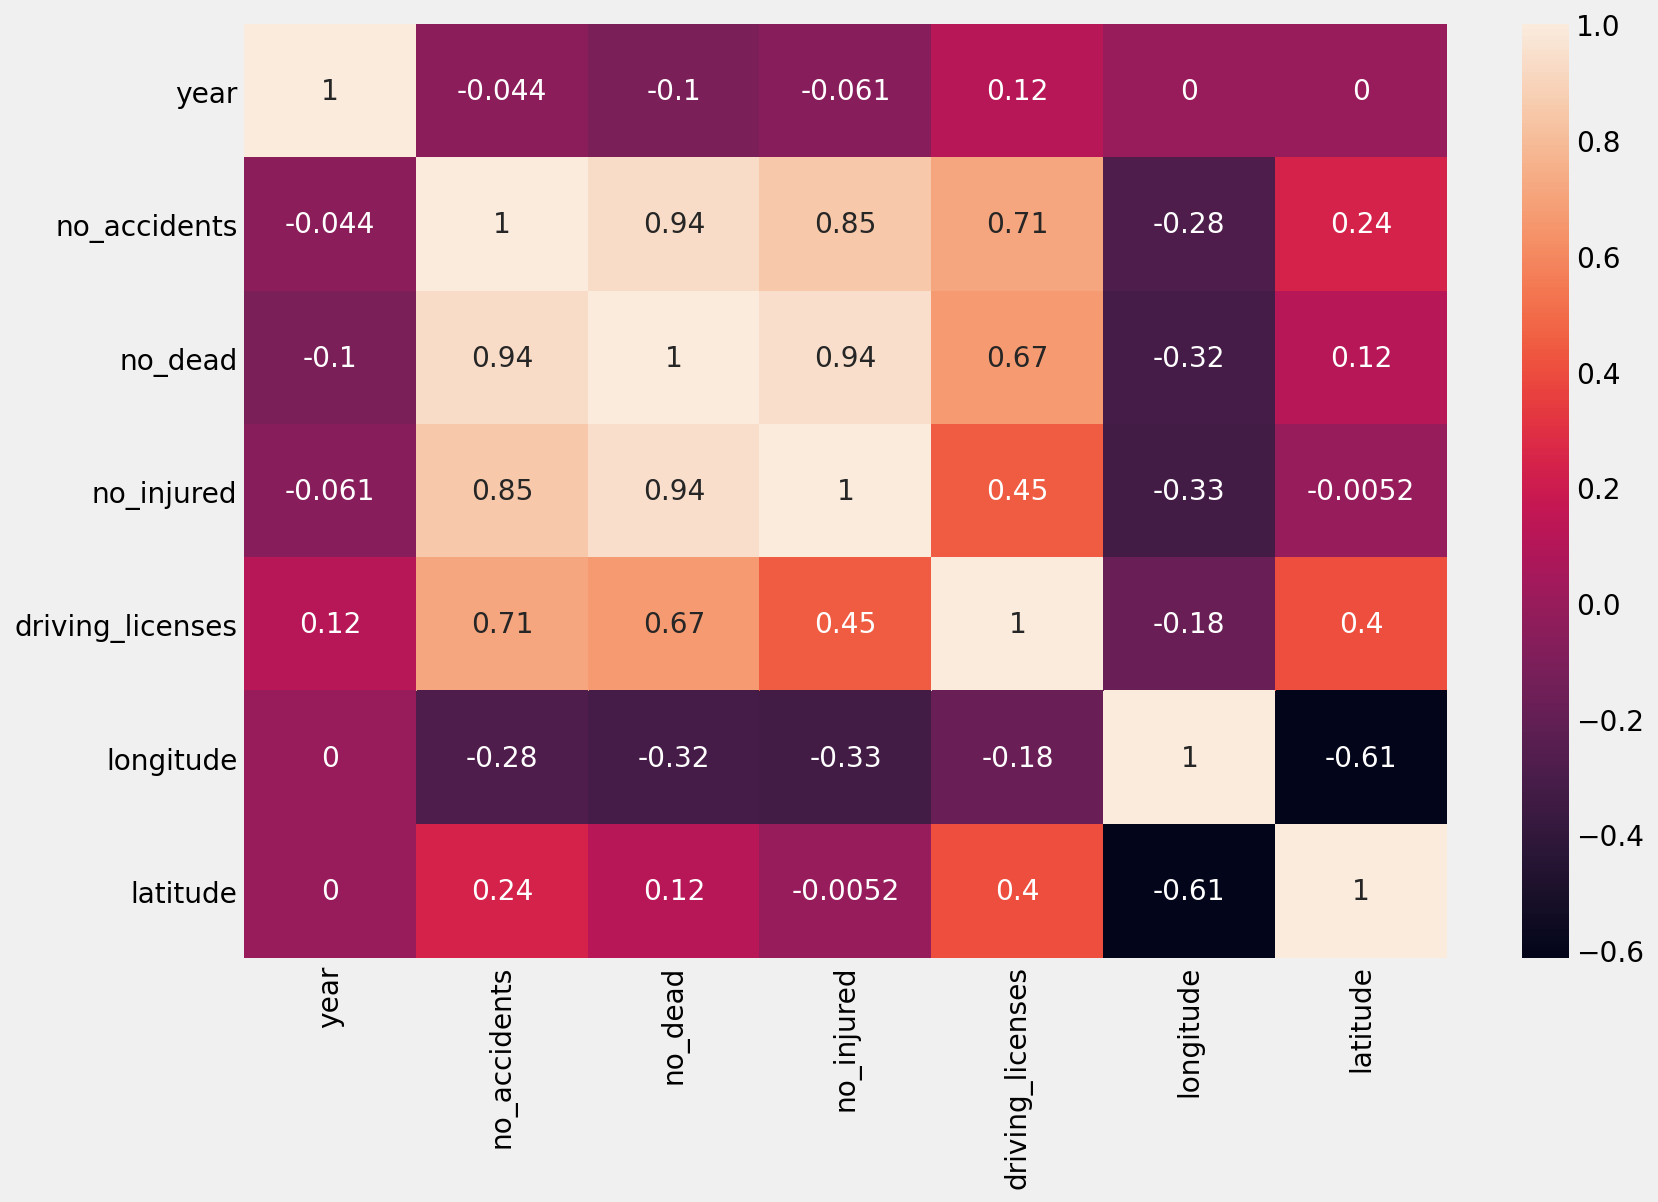

In [40]:

fig, ax = plt.subplots(figsize=(12,8))

ax = sns.heatmap(merged_df1.corr(),annot=True)


#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [41]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles):#, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(10,8)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        ax[i].set_title(list_of_titles[i])# Set titles, labels, etc here for each subplot
    return plt.tight_layout()

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data


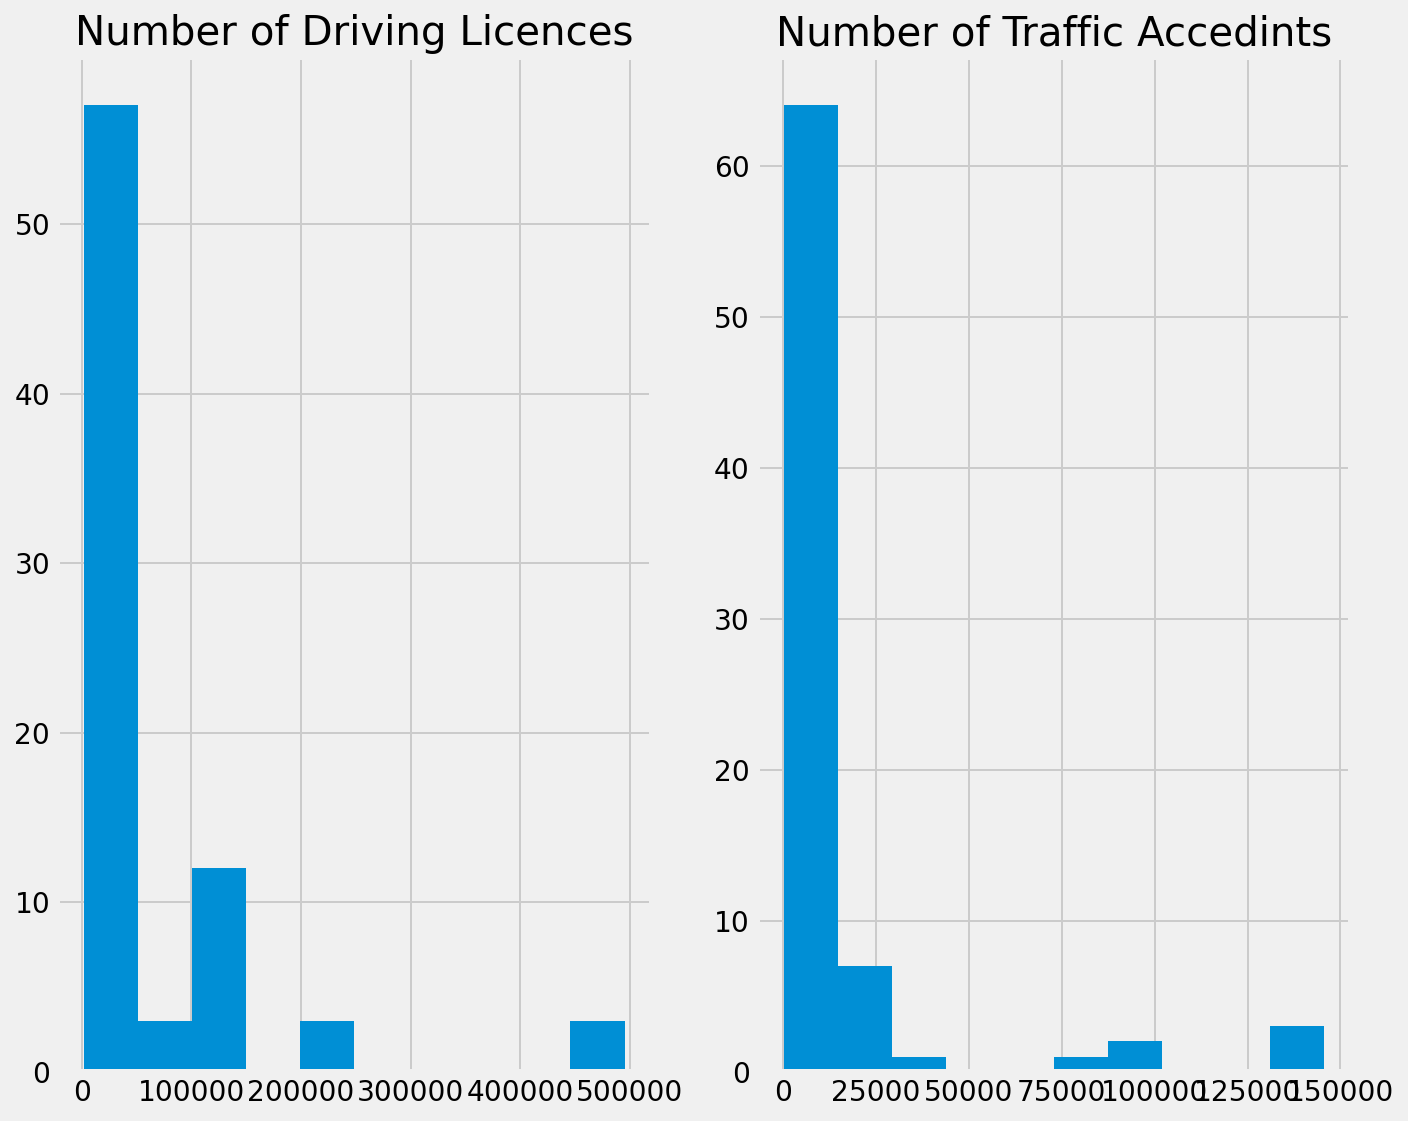

In [42]:
subplot_histograms(merged_df, ['driving_licenses','traffic_accidents'],['Number of Driving Licences','Number of Traffic Accedints'])#, list_of_titles, list_of_xlabels)

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


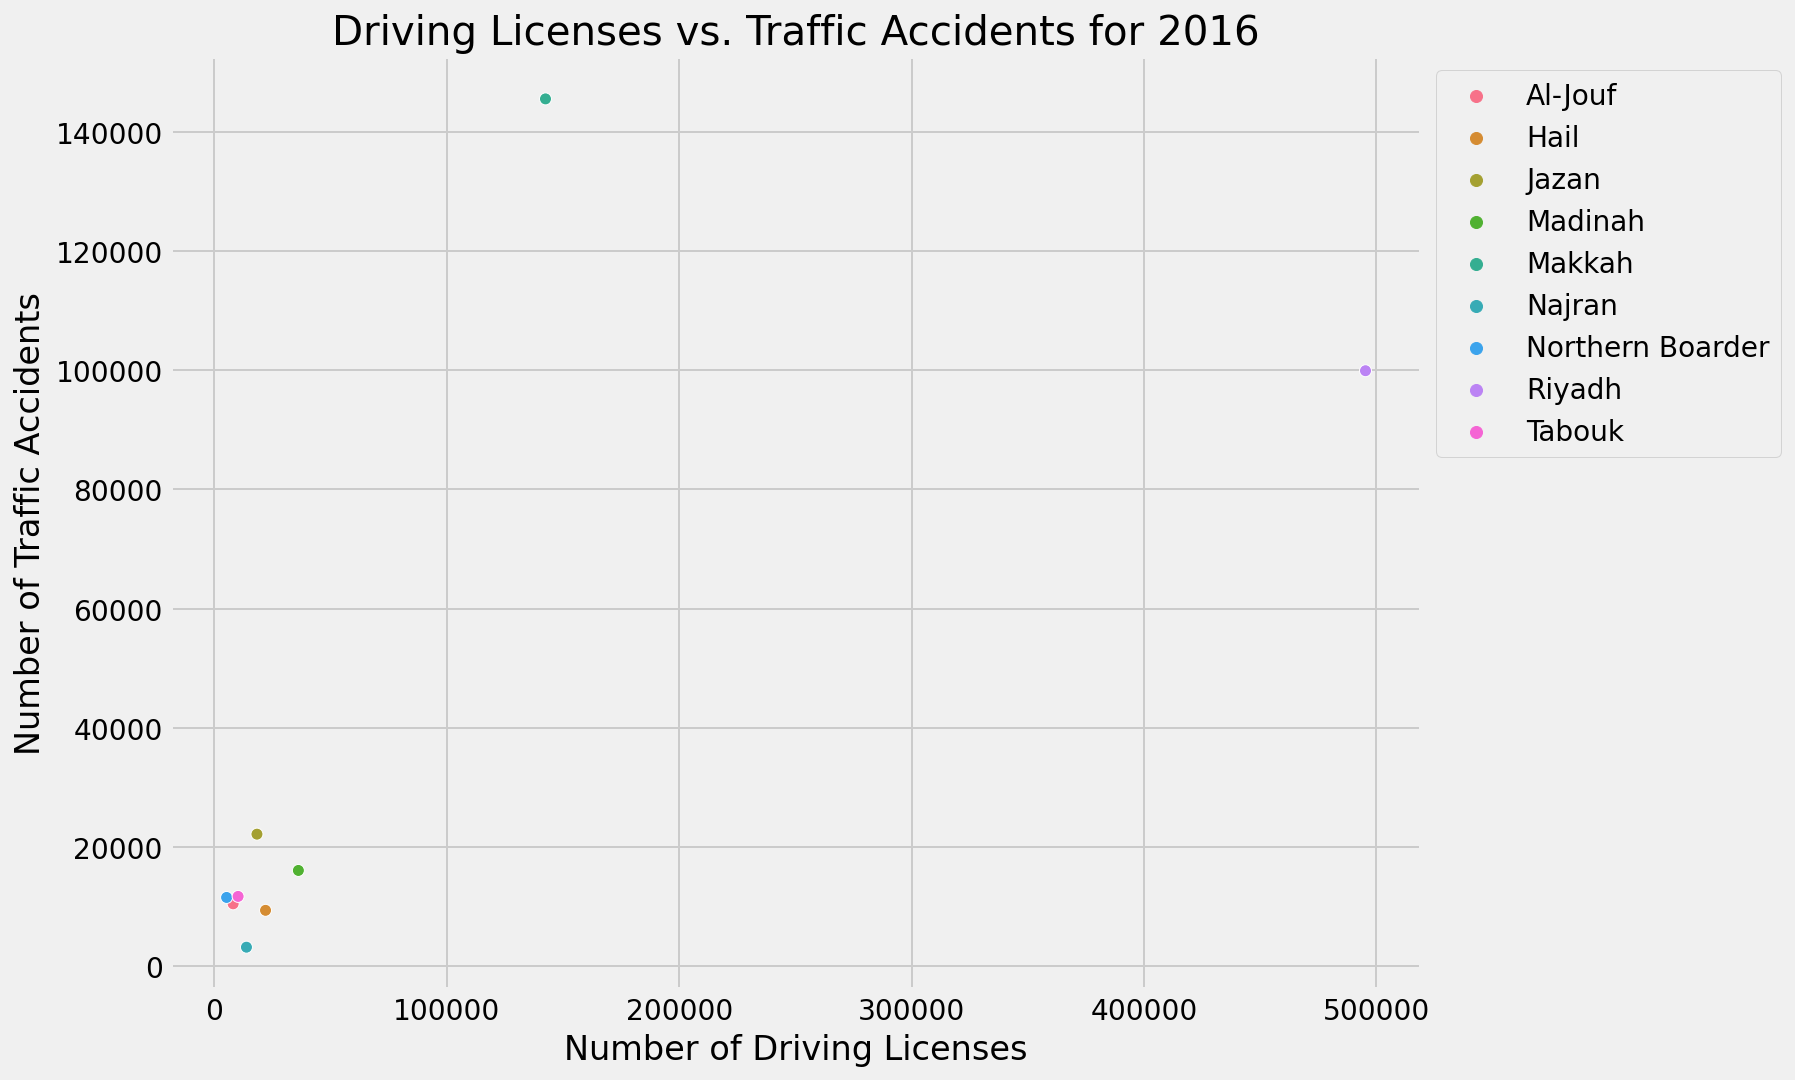

In [43]:
#- Driving Licenses vs. Traffic Accidents for 2016
fig, axes = plt.subplots(figsize=(10,8));
sns.scatterplot(x='driving_licenses',y='no_accidents',hue='region',data=merged_df1[merged_df1['year']==2017]);
axes.legend(bbox_to_anchor=(1,1),loc='upper left')#this line to change position of huebox
axes.set_title('Driving Licenses vs. Traffic Accidents for 2016')
axes.set_xlabel('Number of Driving Licenses')
axes.set_ylabel('Number of Traffic Accidents');

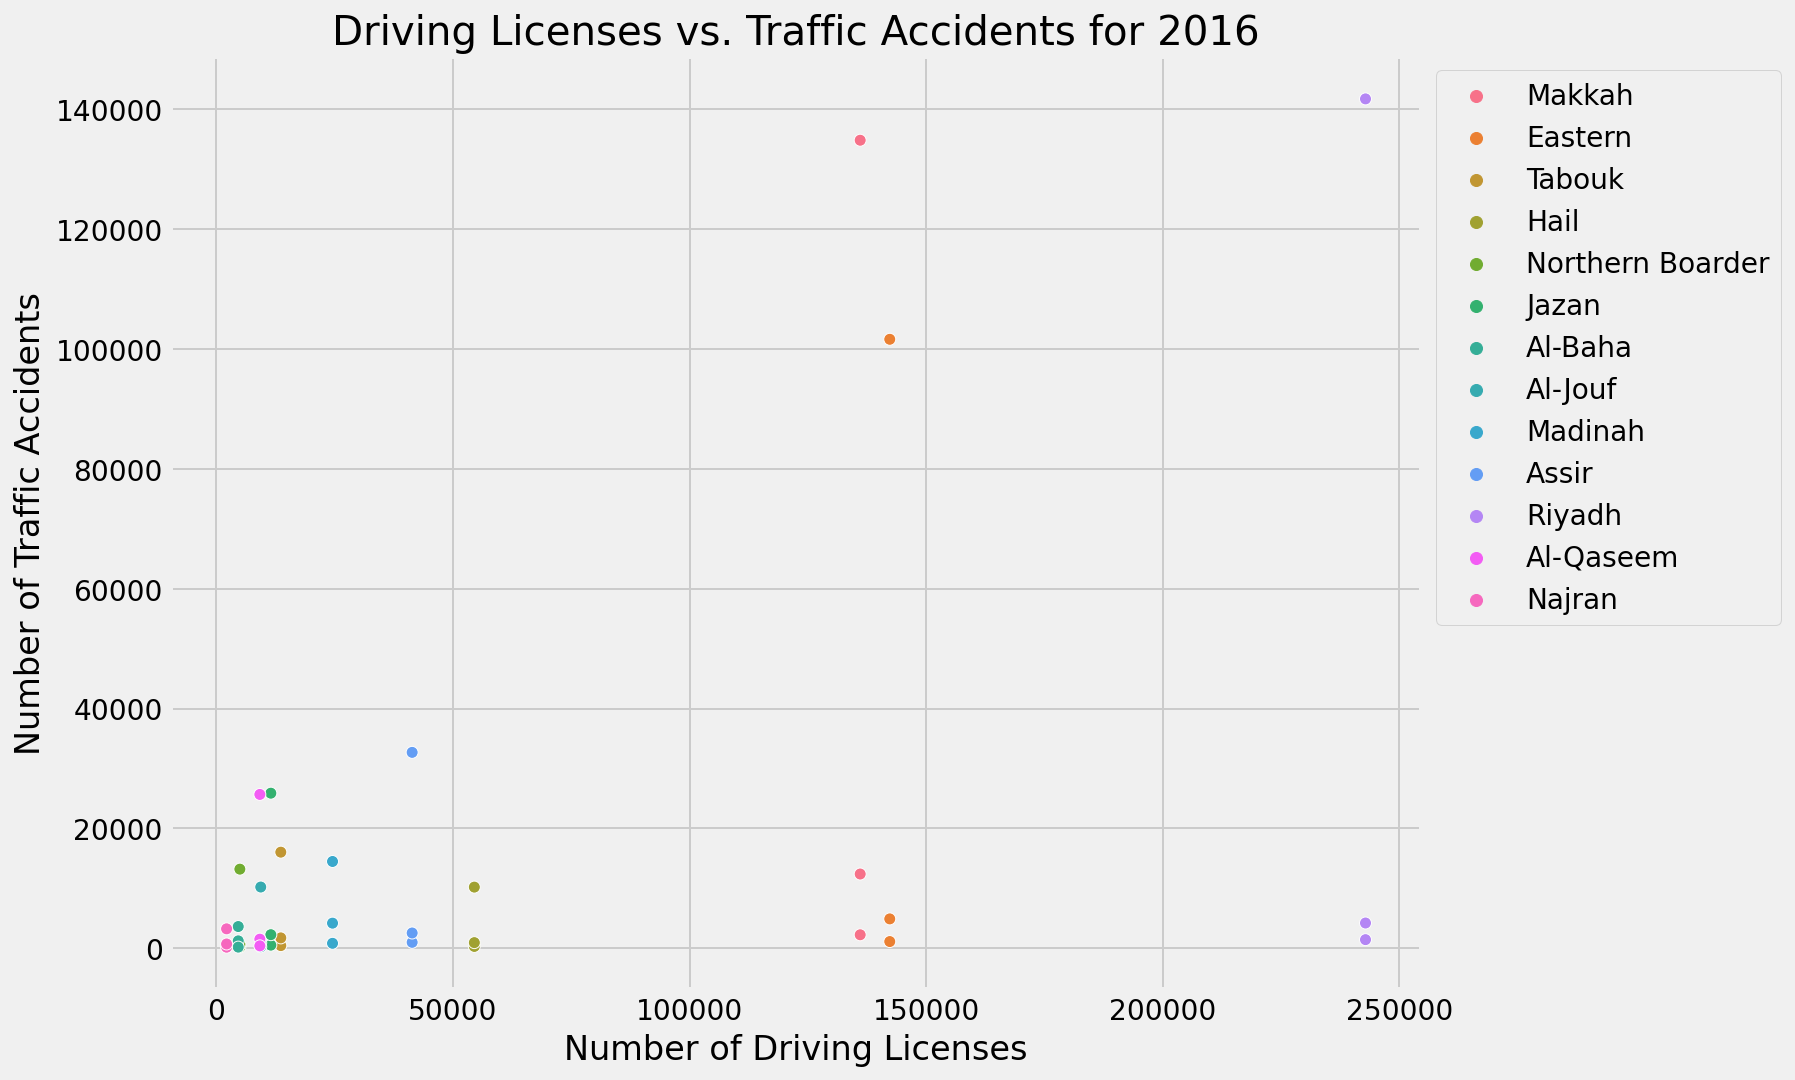

In [44]:
#- Driving Licenses vs. Traffic Accidents for 2016
fig, axes = plt.subplots(figsize=(10,8));
#sns.scatterplot(x='driving_licenses',y='value',hue='region',data=merged_df[merged_df['year']==2017],palette='coolwarm');
sns.scatterplot(x='driving_licenses',y='traffic_accidents',hue='region',data=merged_df[merged_df['year']==2016]);
axes.legend(bbox_to_anchor=(1,1),loc='upper left')#this line to change position of huebox
axes.set_title('Driving Licenses vs. Traffic Accidents for 2016')
axes.set_xlabel('Number of Driving Licenses')
axes.set_ylabel('Number of Traffic Accidents');

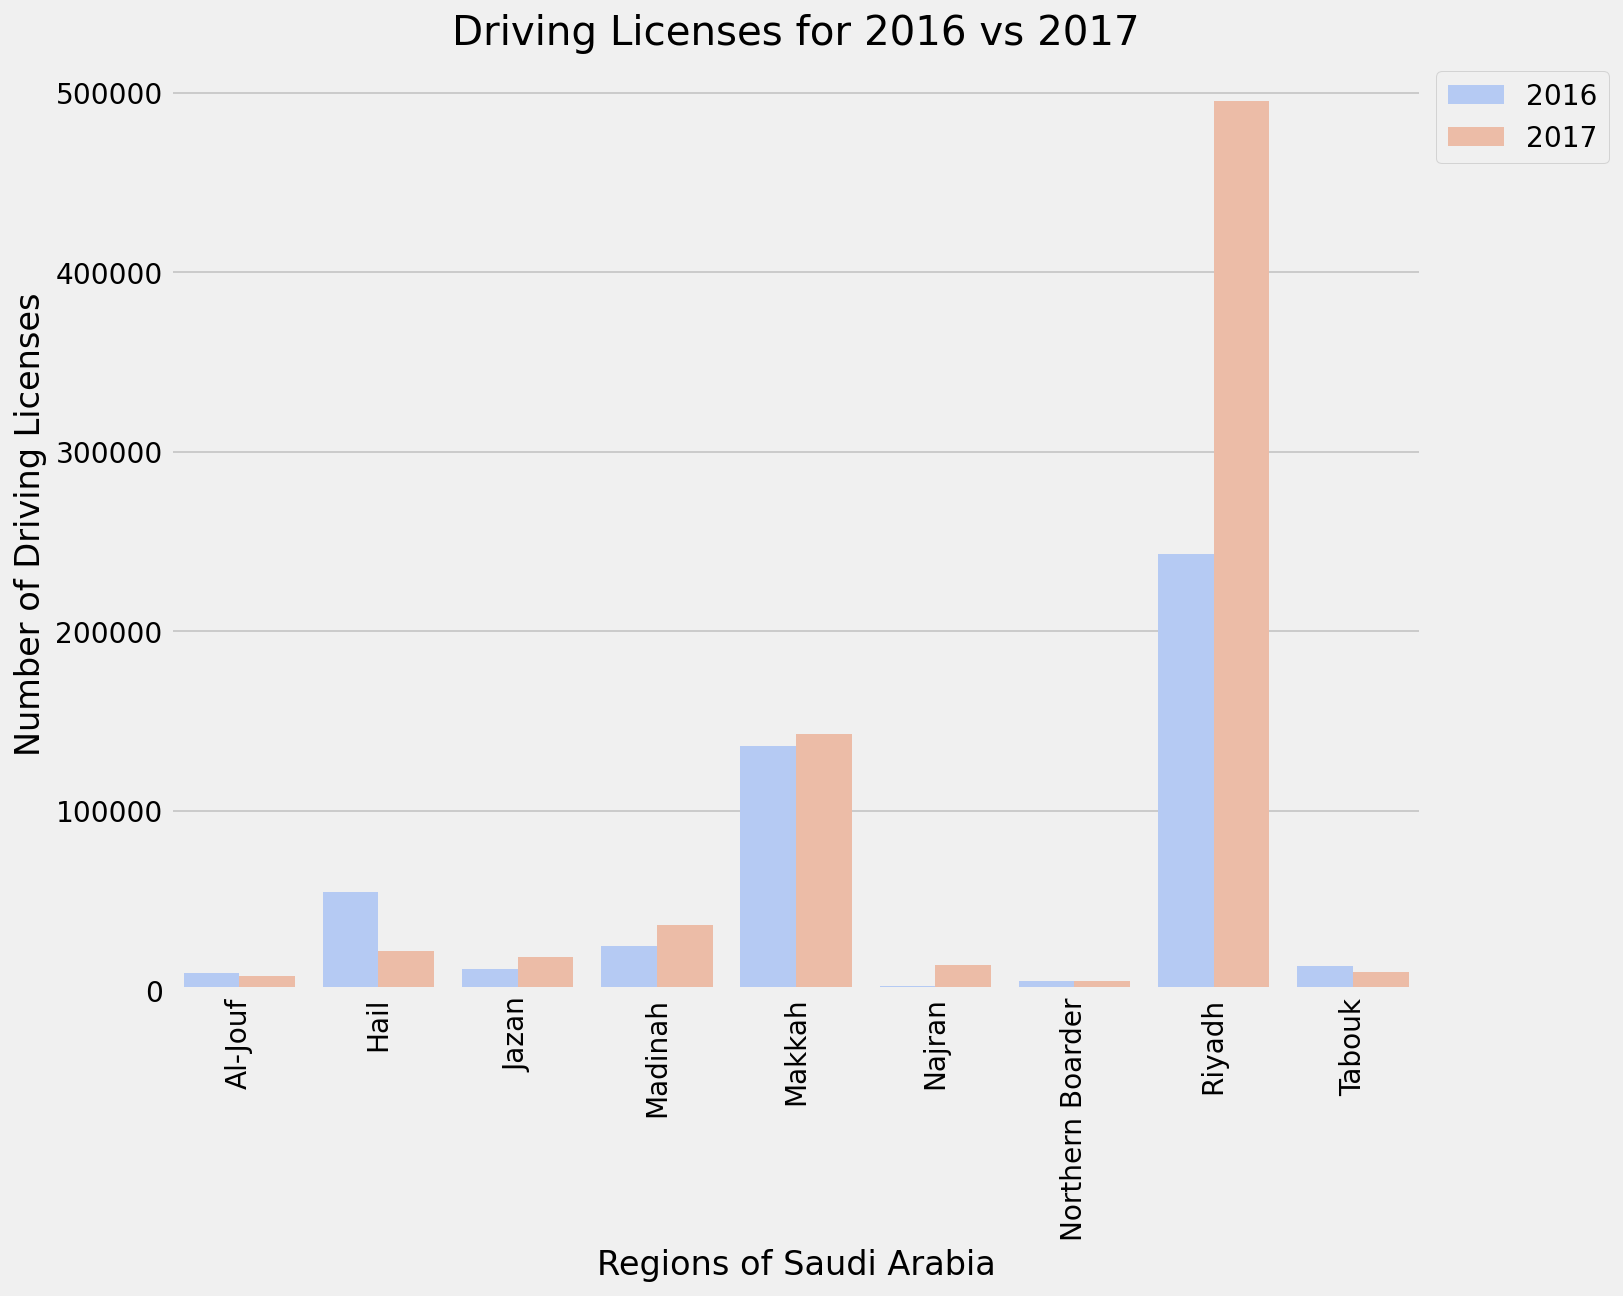

In [45]:
#Driving Licenses for 2016 vs 2017
fig, ax = plt.subplots(figsize=(10,8));


ax = sns.barplot(data=merged_df1, x="region", y="driving_licenses", hue="year",palette='coolwarm')

# Customise some display properties
ax.set_title('Driving Licenses for 2016 vs 2017',fontdict=None)
ax.set_ylabel('Number of Driving Licenses')
ax.set_xlabel('Regions of Saudi Arabia')
ax.xaxis.major_label_orientation = 1
ax.legend(bbox_to_anchor=(1,1),loc='upper left')

ax.set_xticklabels(merged_df1["region"].unique().astype(str), rotation='vertical')

plt.show()


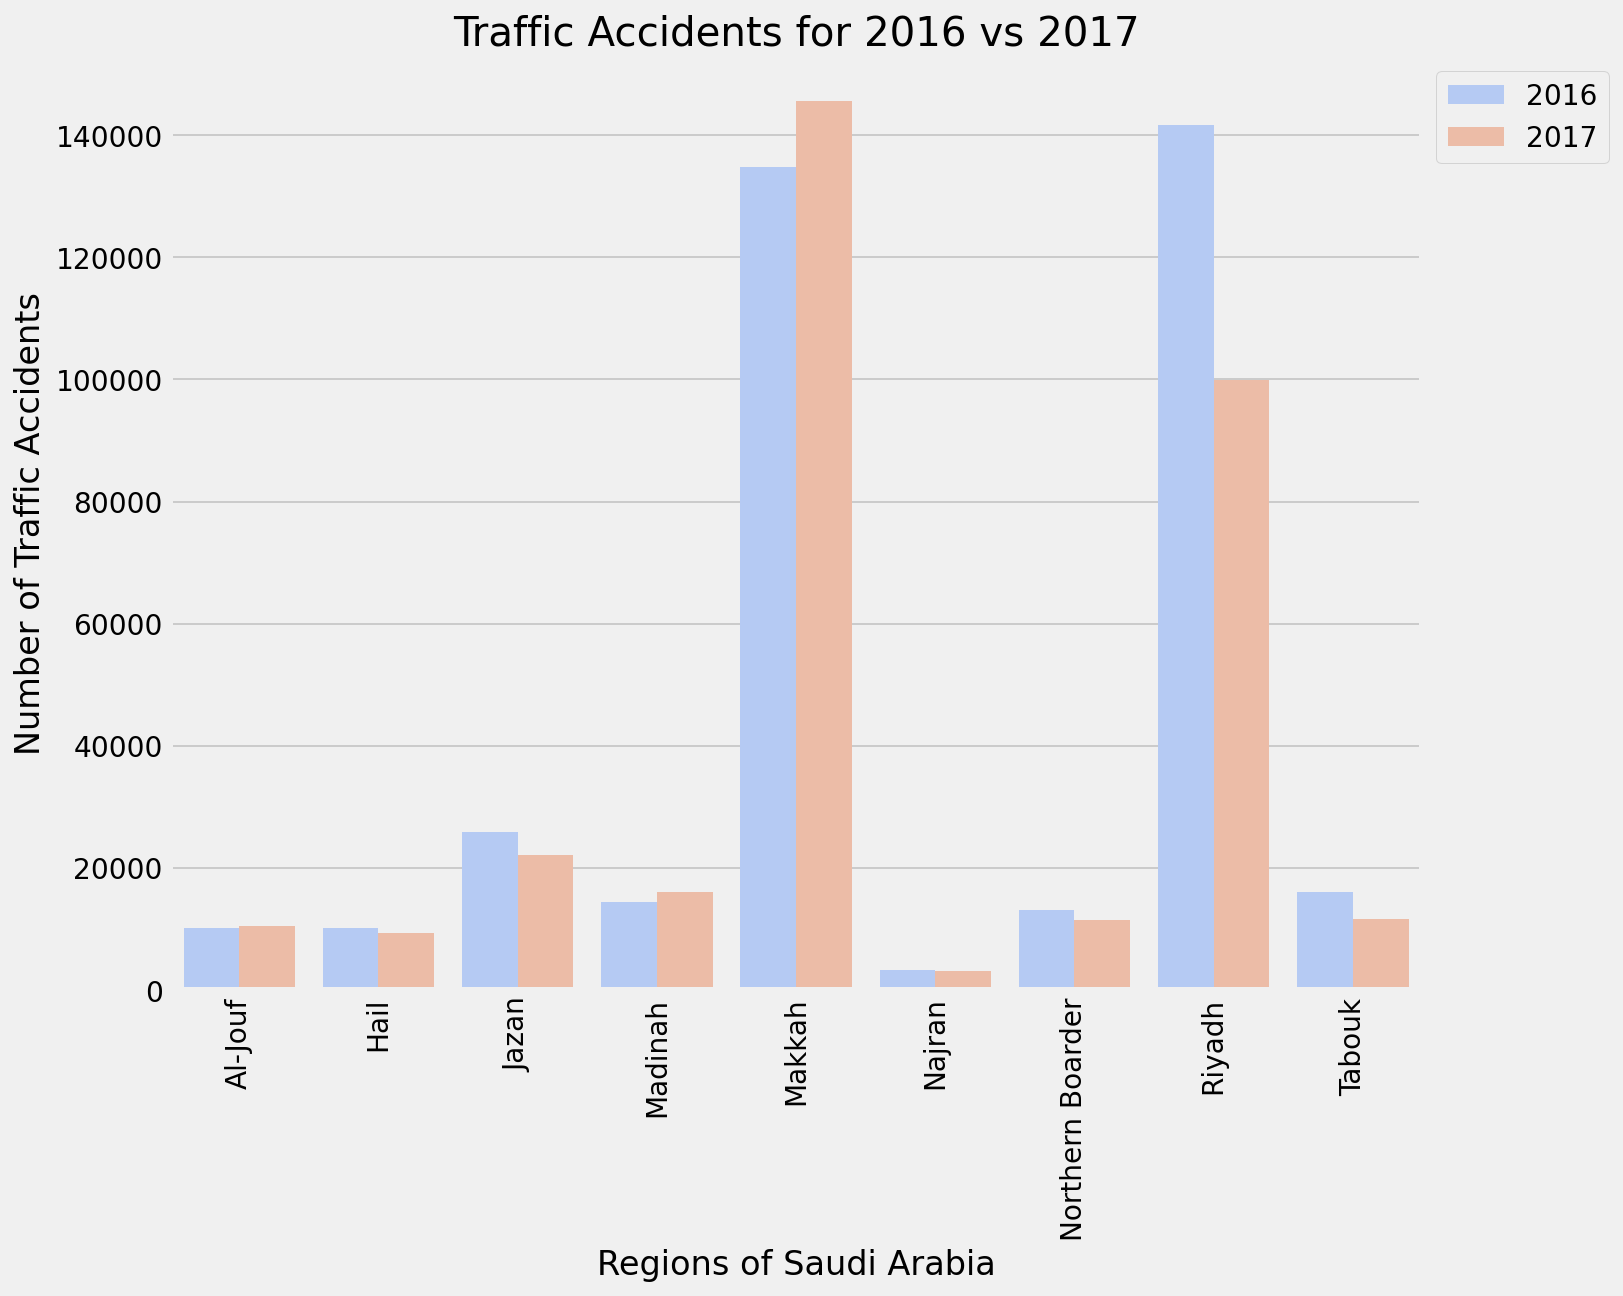

In [46]:
#- Traffic Accidents for 2016 vs 2017

fig, ax = plt.subplots(figsize=(10,8));


ax = sns.barplot(data=merged_df1, x="region", y="no_accidents", hue="year",palette='coolwarm')

    # Customise some display properties
ax.set_title('Traffic Accidents for 2016 vs 2017',fontdict=None)
#ax.grid(color='#cccccc')
ax.set_ylabel('Number of Traffic Accidents')
ax.set_xlabel('Regions of Saudi Arabia')
ax.xaxis.major_label_orientation = 1
ax.legend(bbox_to_anchor=(1,1),loc='upper left')#this line to change position of huebox

ax.set_xticklabels(merged_df1["region"].unique().astype(str), rotation='vertical')

    # Ask Matplotlib to show it
plt.show()


- - the graph shows the number of traffic accidents in 2016 vs 2017:

- in 2017 makkah region has the highest accedints btween all saudi arabia regions with more than 140,000 accedents, where in 2016 Riyadh had the highest accedents and in 2017 the numbers incredibly decreased


#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [47]:
def var_standardized(var):
    var_stand = (var-var.mean())/var.std()
    return var_stand

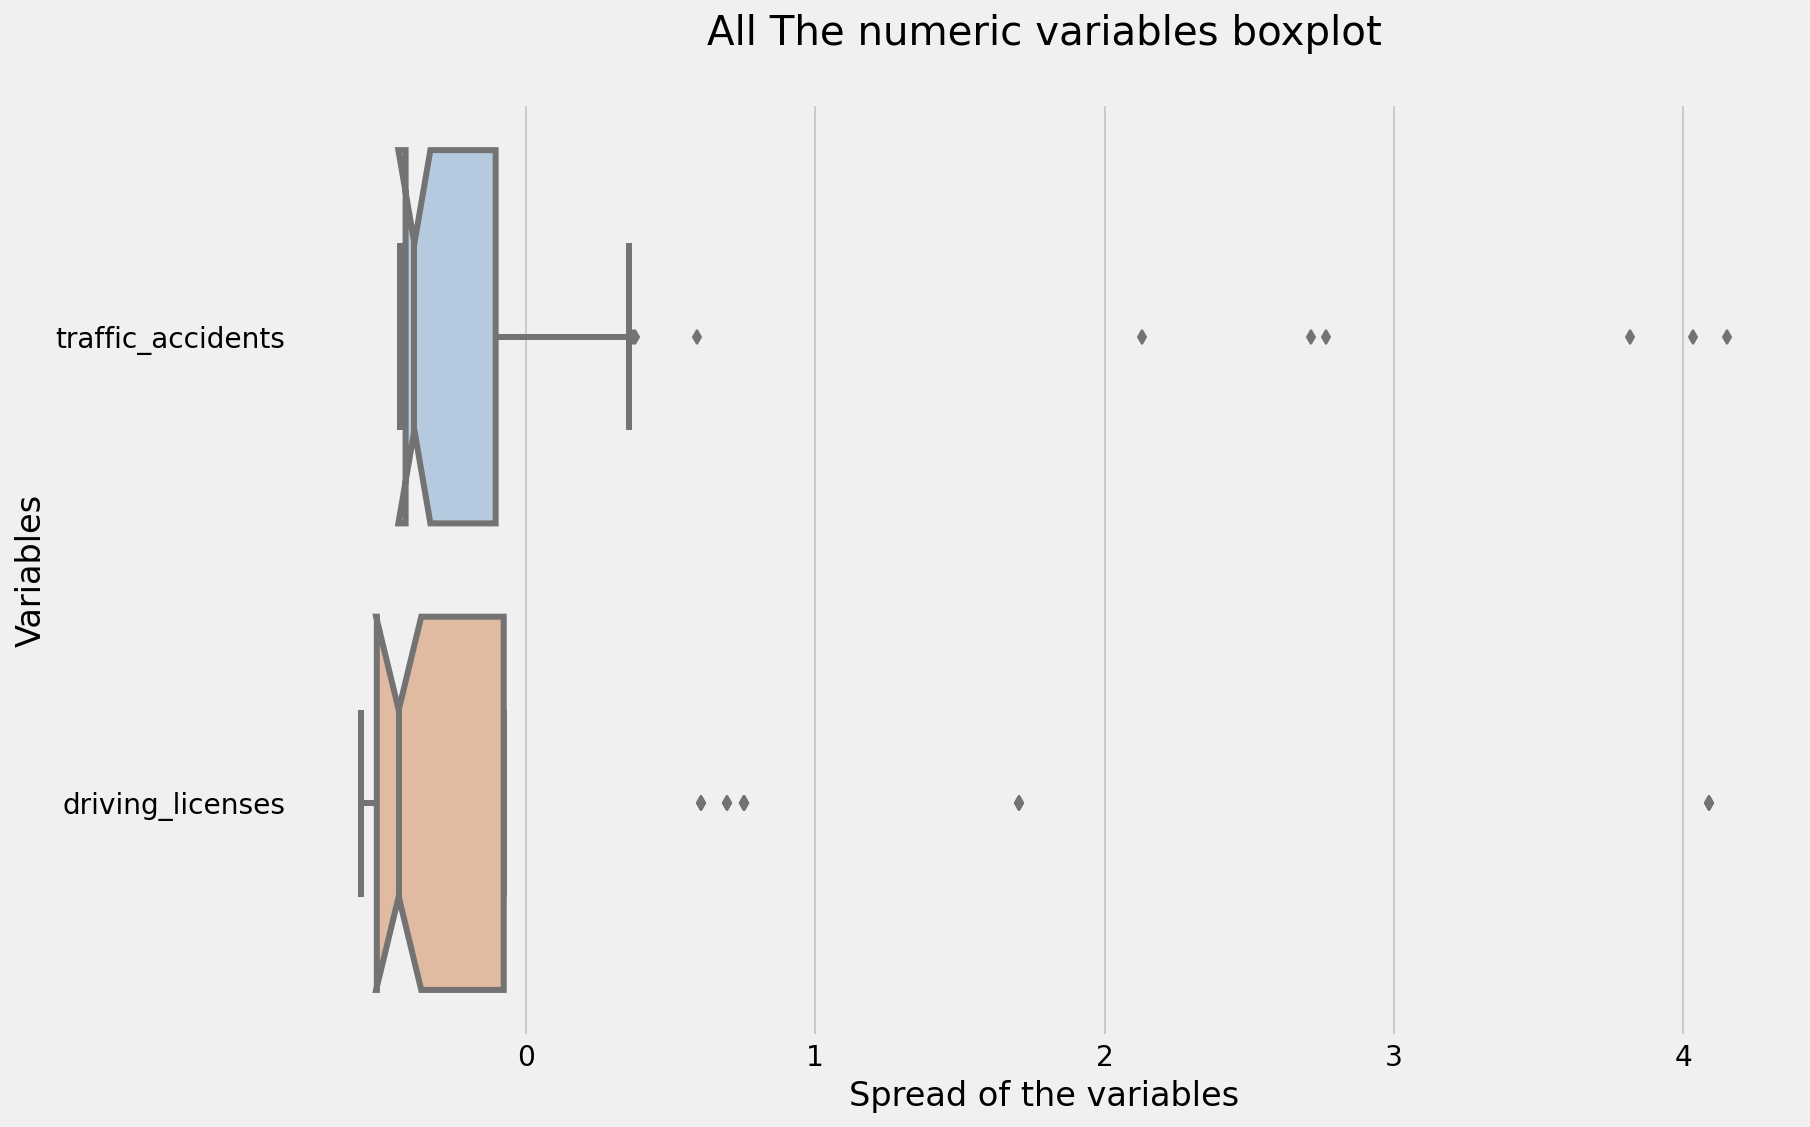

In [48]:
# Code

numeric_df=merged_df[['traffic_accidents','driving_licenses']]
numeric_df_stand = var_standardized(numeric_df)
fig,ax = plt.subplots(figsize=(12,8))
labels=['number of traffic accidents','number of driving licenses']
sns.boxplot(data=numeric_df_stand, orient='h', fliersize=5, linewidth=3, notch=True,
                 saturation=0.5, ax=ax, palette='pastel'
           # labels=labels
           )

ax.set_title('All The numeric variables boxplot\n')
ax.set_ylabel('Variables')
ax.set_xlabel('Spread of the variables')
plt.show()

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

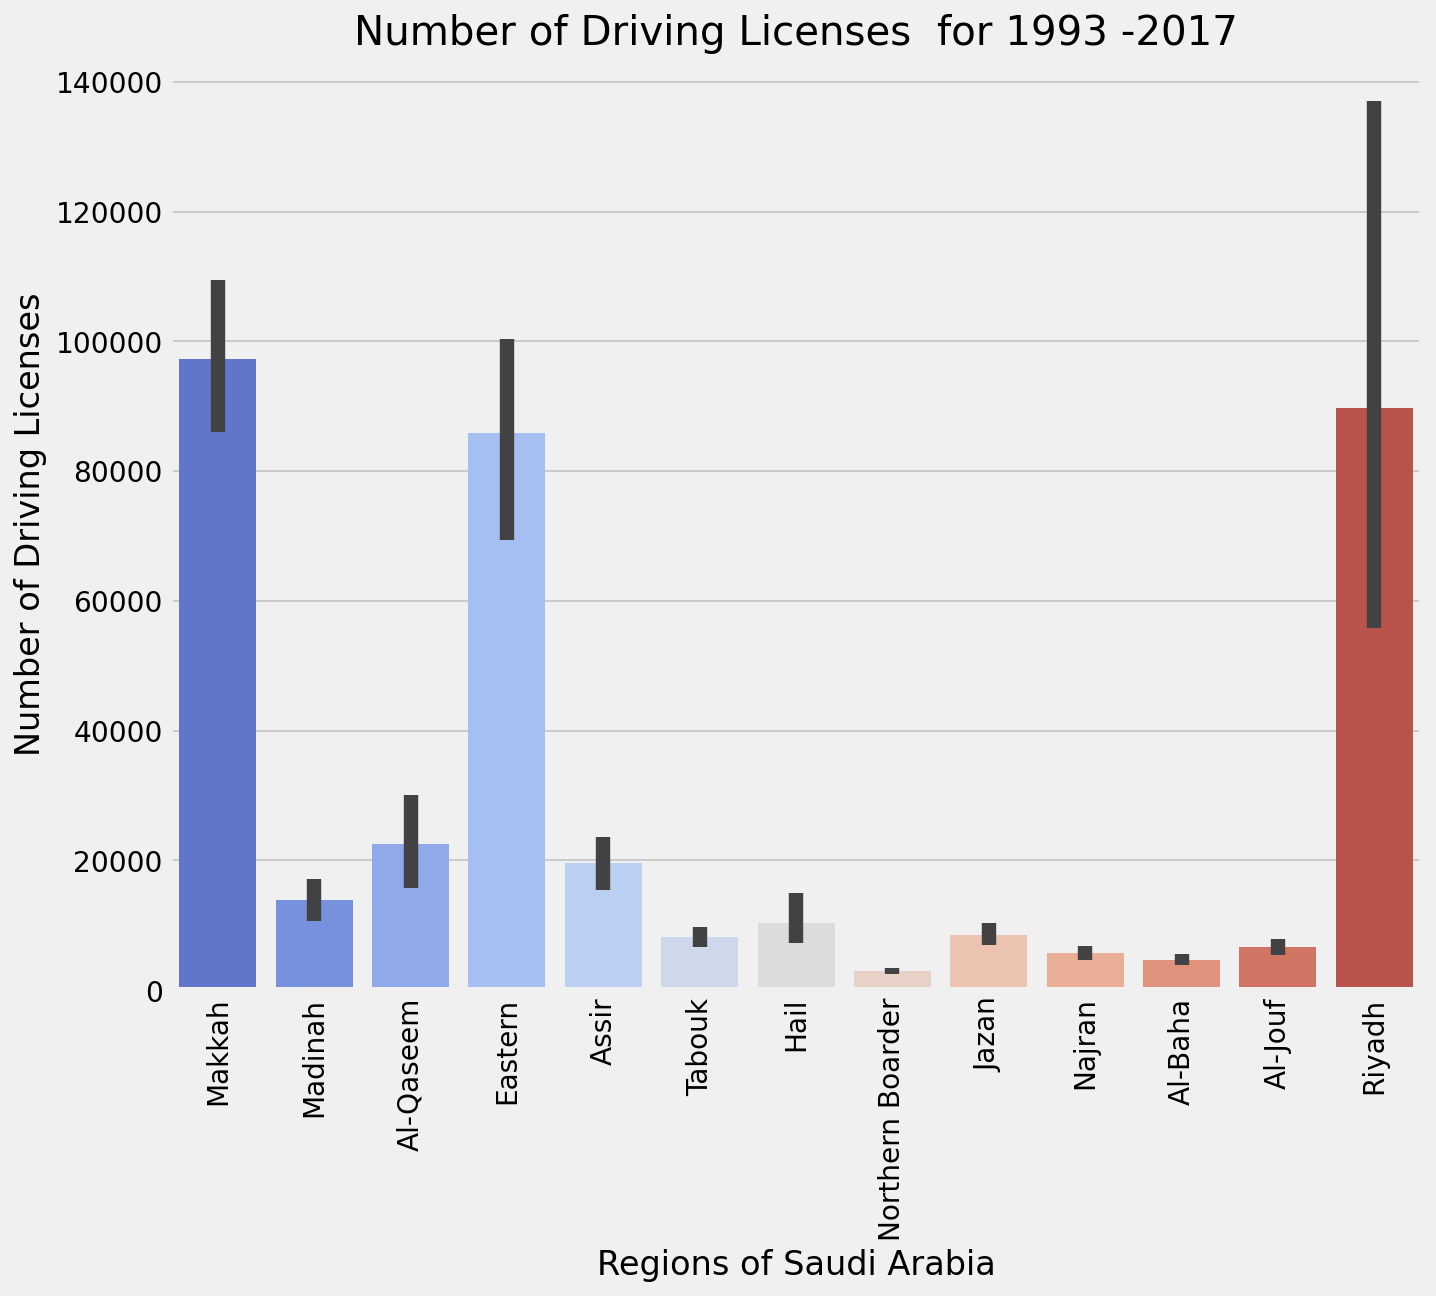

In [49]:
#Number of Driving Licenses in Each Region for 1993 -2017
fig, ax = plt.subplots(figsize=(10,8))


ax = sns.barplot(data=new_driving, x="region", y="driving_licenses",palette='coolwarm',)

    # Customise some display properties
ax.set_title('Number of Driving Licenses  for 1993 -2017',fontdict=None)
#ax.grid(color='#cccccc')
ax.set_ylabel('Number of Driving Licenses')
ax.set_xlabel('Regions of Saudi Arabia')
#ax.legend(bbox_to_anchor=(1,1),loc='upper left')#this line to change position of huebox

ax.set_xticklabels(new_driving["region"].unique().astype(str), rotation='vertical')

    # Ask Matplotlib to show it
plt.show()



- the graph shows the number of driving licenses issued for in each region and we can see that Makkah, Riyadh and eastern the highest regions in issuing licenses over the years from 1993 to 2017.

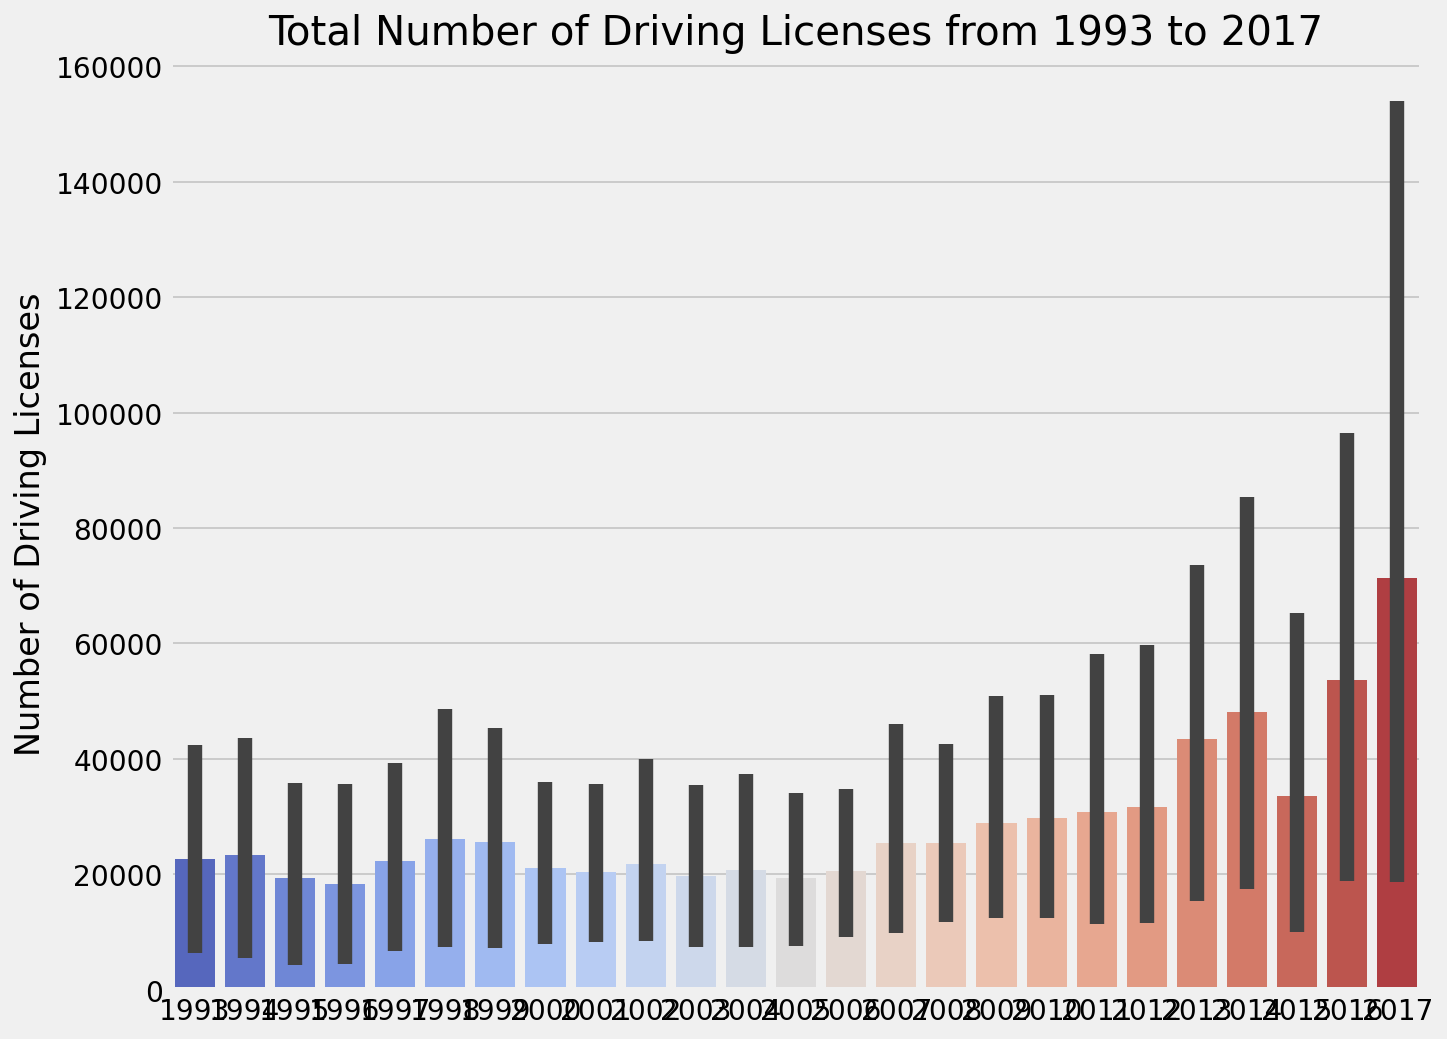

In [50]:
#Total Number of Driving Licenses from 1993 to 2017
fig, ax = plt.subplots(figsize=(10,8))


ax = sns.barplot(data=new_driving, x="year", y="driving_licenses",palette='coolwarm',)

# Customise some display properties
ax.set_title('Total Number of Driving Licenses from 1993 to 2017',fontdict=None)
ax.set_ylabel('Number of Driving Licenses')
ax.set_xlabel(None)


plt.show()



- the graph shows the number of driving licenses issued for all regions over the years and we can see the increasing in the issued licenses every year. that may due to increasing number of population or an increasing in the economy of Saudi Arabia

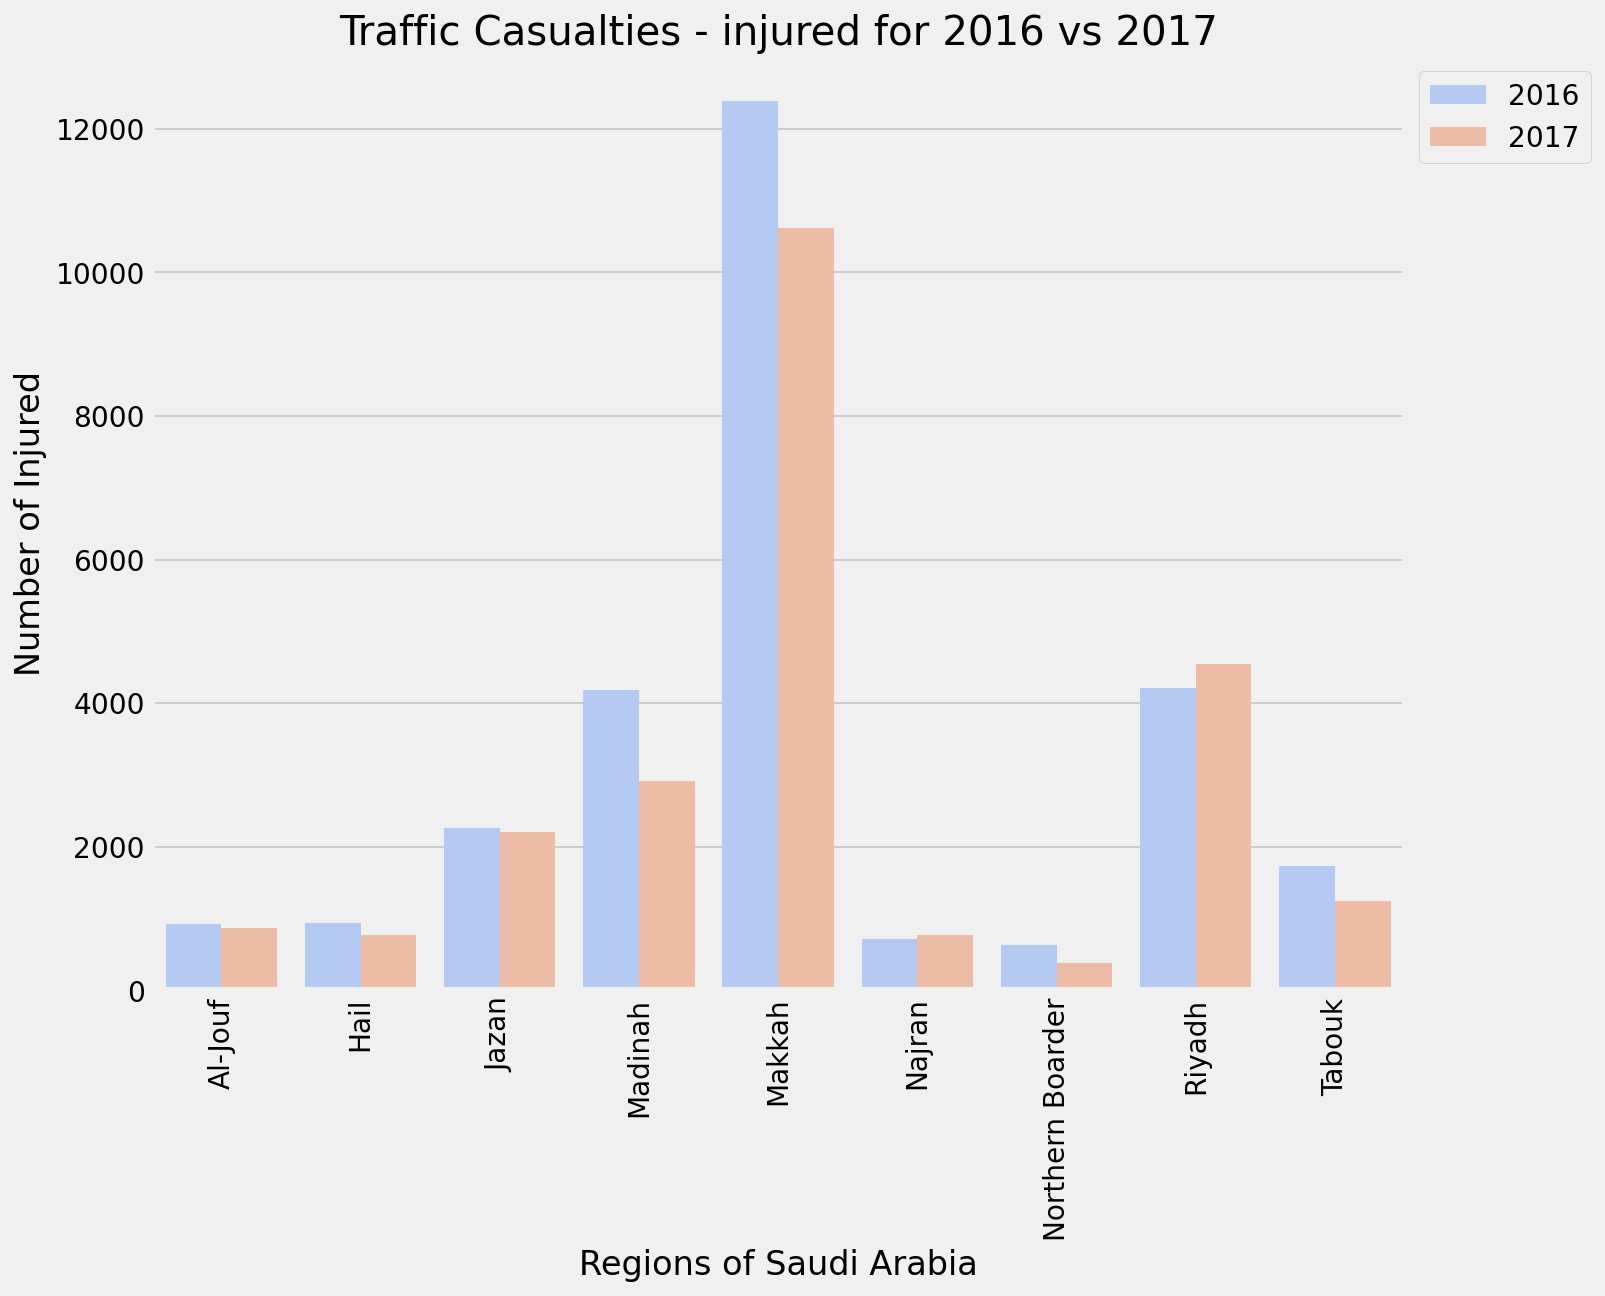

In [51]:

fig, ax = plt.subplots(figsize=(10,8));


ax = sns.barplot(data=merged_df1, x="region", y="no_injured", hue="year",palette='coolwarm')

# Customise some display properties
ax.set_title('Traffic Casualties - injured for 2016 vs 2017',fontdict=None)
ax.set_ylabel('Number of Injured')
ax.set_xlabel('Regions of Saudi Arabia')
ax.xaxis.major_label_orientation = 1
ax.legend(bbox_to_anchor=(1,1),loc='upper left')#this line to change position of huebox

ax.set_xticklabels(merged_df1["region"].unique().astype(str), rotation='vertical')#this line to control the labels in x axis


plt.show()


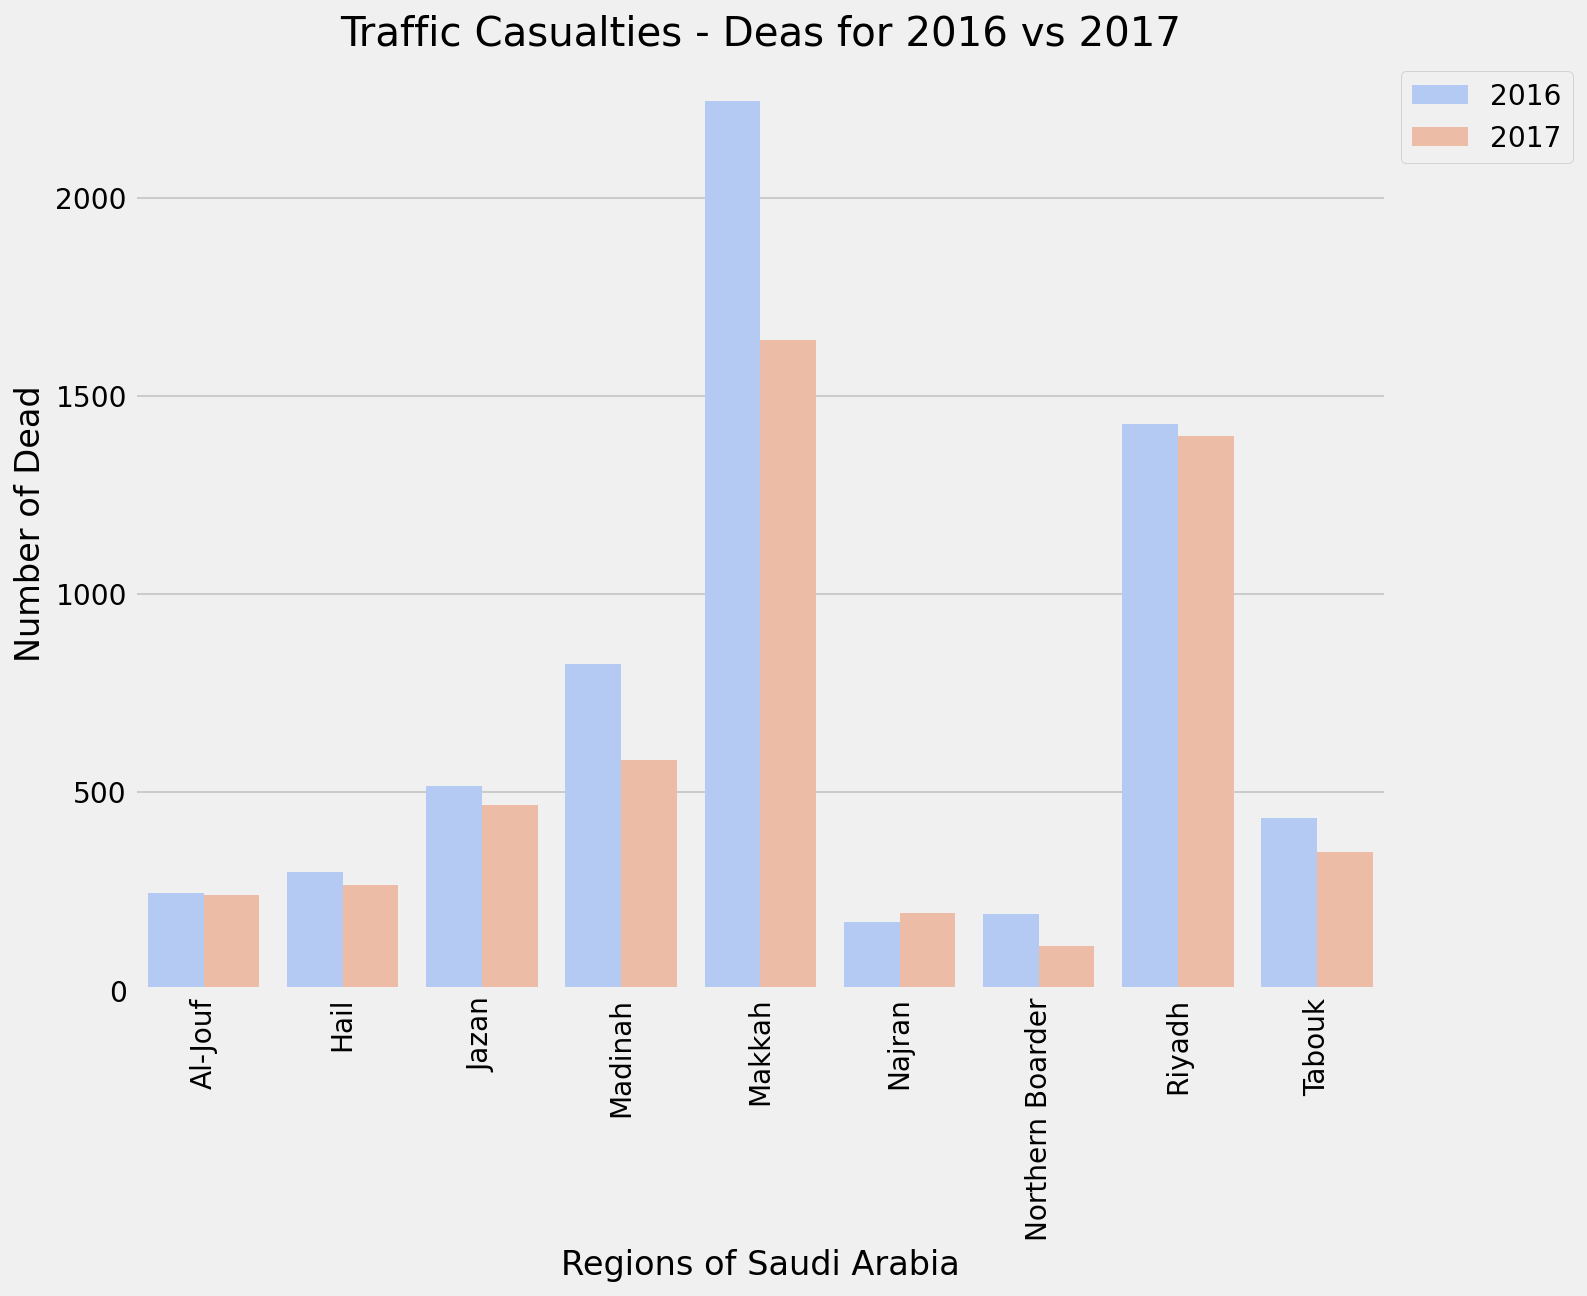

In [52]:

fig, ax = plt.subplots(figsize=(10,8));


ax = sns.barplot(data=merged_df1, x="region", y="no_dead", hue="year",palette='coolwarm')

# Customise some display properties
ax.set_title('Traffic Casualties - Deas for 2016 vs 2017',fontdict=None)
ax.set_ylabel('Number of Dead')
ax.set_xlabel('Regions of Saudi Arabia')
ax.xaxis.major_label_orientation = 1
ax.legend(bbox_to_anchor=(1,1),loc='upper left')#this line to change position of huebox

ax.set_xticklabels(merged_df1["region"].unique().astype(str), rotation='vertical')#this line to control the labels in x axis

plt.show()



## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [53]:
merged_df.describe()

,year,traffic_accidents,longitude_x,latitude_x,driving_licenses,longitude_y,latitude_y
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,2016.500000,13868.038462,23.810447,42.602789,62507.000000,23.810447,42.602789
std,0.503236,31716.885363,4.218654,3.270216,105891.322576,4.218654,3.270216
min,2016.000000,112.000000,17.207231,37.259858,2153.000000,17.207231,37.259858
25%,2016.000000,721.000000,20.148406,41.263690,8091.000000,20.148406,41.263690
50%,2016.500000,1682.500000,23.288331,41.817119,16085.000000,23.288331,41.817119
75%,2017.000000,10584.500000,27.400846,43.343000,54507.000000,27.400846,43.343000
max,2017.000000,145541.000000,30.197075,50.147830,495307.000000,30.197075,50.147830


In [54]:
merged_df.median()

year                  2016.500000
traffic_accidents     1682.500000
longitude_x             23.288331
latitude_x              41.817119
driving_licenses     16085.000000
longitude_y             23.288331
latitude_y              41.817119
dtype: float64

In [55]:
merged_df.skew()

year                 0.000000
traffic_accidents    3.204237
longitude_x          0.021152
latitude_x           0.725664
driving_licenses     2.904028
longitude_y          0.021152
latitude_y           0.725664
dtype: float64

- The number of driving_licenses and number of traffic_accidents does not have normal distrubiution as the mean higher  than the median, and they seems have positive skew, we will run  hypothesis tests later to assured of the type of distrubiution.
- also th standard deviation is high, which indicate that the data spread out.


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

(array([57.,  3., 12.,  0.,  3.,  0.,  0.,  0.,  0.,  3.]),
 array([  2153. ,  51468.4, 100783.8, 150099.2, 199414.6, 248730. ,
        298045.4, 347360.8, 396676.2, 445991.6, 495307. ]),
 <BarContainer object of 10 artists>)

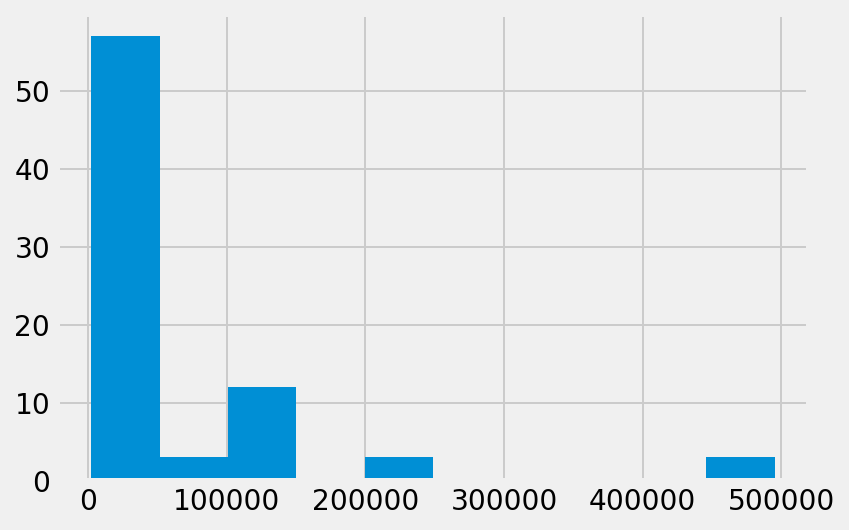

In [56]:
plt.hist(merged_df.driving_licenses)

(array([64.,  7.,  1.,  0.,  0.,  1.,  2.,  0.,  0.,  3.]),
 array([1.120000e+02, 1.465490e+04, 2.919780e+04, 4.374070e+04,
        5.828360e+04, 7.282650e+04, 8.736940e+04, 1.019123e+05,
        1.164552e+05, 1.309981e+05, 1.455410e+05]),
 <BarContainer object of 10 artists>)

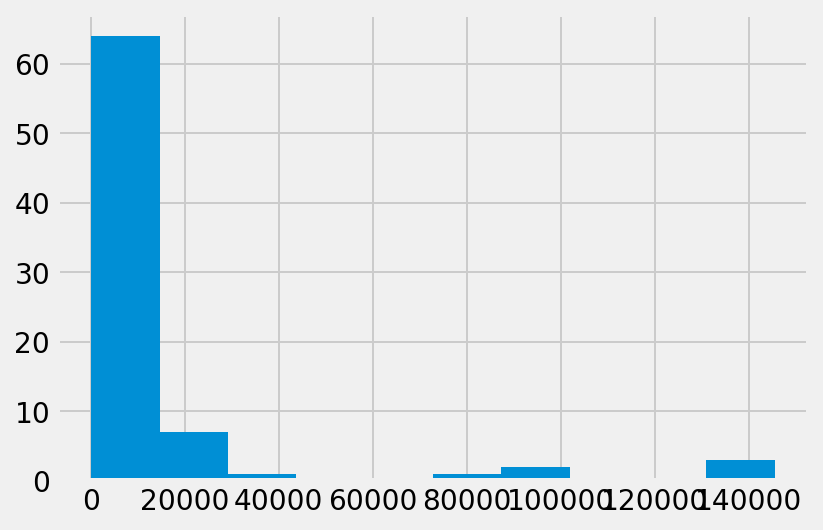

In [57]:
plt.hist(merged_df.traffic_accidents)

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.


Answer: we can found out from the obervation of the above two histograms that the numerical values in the dataset are right skewed.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [58]:
   
    # scipy.stats.normaltest The tests assume that that the sample was drawn from a Gaussian distribution.
#called the null hypothesis.  A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value.

#p <= alpha: reject null hypothesis, not normal.
#p > alpha: fail to reject null hypothesis, normal.
from scipy.stats import normaltest, skew

for col in merged_df:
     if merged_df[col].dtype==np.float64:
        skewnes=merged_df[col].skew()
        if skewnes ==0:
            print(col,'has skewness: ',skewnes,'is normally distributed')
        elif skewnes>0:
            print(col,'skewness: ',skewnes,'is positive skewness ')
        elif skewnes<0:
            print(col,'skewness: ',skewnes,'is negative skewness ')
        stat, p = normaltest(merged_df[col])
        #print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print(' normaly distrubiution (fail to reject null hypothesis)')
        else:
            print(' reject null hypothesis, not normaly distrubiution ')

longitude_x skewness:  0.02115171210493273 is positive skewness 
 reject null hypothesis, not normaly distrubiution 
latitude_x skewness:  0.725663570062788 is positive skewness 
 reject null hypothesis, not normaly distrubiution 
longitude_y skewness:  0.02115171210493273 is positive skewness 
 reject null hypothesis, not normaly distrubiution 
latitude_y skewness:  0.725663570062788 is positive skewness 
 reject null hypothesis, not normaly distrubiution 


## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Answer:

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

- Our finding of this study is that Riyadh and Makkah were the regions with highest number of the issued driving licences and they also had highest number of accidents and they were above the average of Saudi Arabia.
- The highest region in all years in issuing driving licensees was Makkah region, and Northern region was the lowest region in issuing driving licensees.

- In 2017, Makkah region has the highest accidents between all Saudi Arabia regions with more than 140,000 accidents, where in 2016 Riyadh had the highest accidents and in 2017 the numbers incredibly decreased. And Najran had the lowest number with less than 1500 accidents.


- My recommendation is that more information need to be added about the accidents such as the time of accidents; which time has more accidents rate during vacations or working days, how the use of safety belt affects the number of injured vs. the number of dead?, what the cause of accidents? is it using phone while driving, the high speed, or crowded area,.. etc and the age of driver; is he/she licensed or not. And according to the cause a better actions can be taken in order to prevent these causes. Also the dataset should add the recent years, since Saudi Arabia allowed women to drive from 2018 to investigate how this decision affect the traffic in Saudi Arabia.